### 1. Import Libraries

In [1]:
# Import core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr

# Show all columns
pd.set_option('display.max_columns', None)

# Optional: Show all rows (if needed)
# pd.set_option('display.max_rows', None)

### 2. Load the Dataset

In [2]:
# Load dataset from the specific file path
df = pd.read_csv('D:\\PowerBI\\Kellogg\'s MT & GT Route Analysis\\Route-Wise GT Sales Pre vs Post MT Outlet Opening_Full table.csv')

# Check the first few rows
df.head()

,Outlet Name,Opeing Month,Related GT Route,No. of Outlets,GT Sales (Before),GT Sales (After),GT Growth%,Memo Count (Before),Memo Count (After),Memo Count Growth%,MT Sales (3 Months),Route's Total Sales,Route's Growth%,Gap,District,Outlet Stetus
0,Shwapno- Block D Mirpur 15 Outlet,10/1/2024,Mirpur-13 (Mirpur),45,48240.96,158975.82,229.55%,61,180,195.08%,17705.14,176680.96,266.25%,128440.00,Dhaka,Metro
1,Agora-Hirajheel Siddirgong,2/1/2025,Hirajil (Siddergonj),43,235776.55,435100.98,84.54%,293,278,-5.12%,11653.14,446754.12,89.48%,210977.57,Dhaka,Metro
2,Shwapno- Panchar Madaripur Outlet,1/1/2025,Shivchor (Madaripur),47,172549.45,313219.66,81.52%,211,237,12.32%,27585.05,340804.71,97.51%,168255.26,Madaripur,Non-Metro
3,Shwapno- Cheragali Outlet,10/1/2024,Chareg Ali Samaj Kallan Road (Tongi),30,137967.98,246993.64,79.02%,126,248,96.83%,15909.00,262902.64,90.55%,124934.66,Gazipur,Non-Metro
4,Shwapno-Nolta Bazar Satkhira Outlet,11/1/2024,Nalta (Satkhira),26,44500.42,76058.95,70.92%,83,128,54.22%,11531.76,87590.71,96.83%,43090.29,Satkhira,Non-Metro


In [3]:
# Check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Outlet Name          33 non-null     object 
 1   Opeing Month         33 non-null     object 
 2   Related GT Route     33 non-null     object 
 3   No. of Outlets       33 non-null     int64  
 4   GT Sales (Before)    33 non-null     float64
 5   GT Sales (After)     33 non-null     float64
 6   GT Growth%           33 non-null     object 
 7   Memo Count (Before)  33 non-null     int64  
 8   Memo Count (After)   33 non-null     int64  
 9   Memo Count Growth%   33 non-null     object 
 10  MT Sales (3 Months)  33 non-null     float64
 11  Route's Total Sales  33 non-null     float64
 12  Route's Growth%      33 non-null     object 
 13  Gap                  33 non-null     float64
 14  District             33 non-null     object 
 15  Outlet Stetus        33 non-null     objec

In [4]:
# Optional: Quick summary of numerical columns
df.describe()

,No. of Outlets,GT Sales (Before),GT Sales (After),Memo Count (Before),Memo Count (After),MT Sales (3 Months),Route's Total Sales,Gap
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,40.242424,198142.532121,168328.354545,174.636364,179.272727,28503.087879,196831.442424,-1311.089697
std,10.295722,154964.843532,93212.684490,85.540129,73.236463,17079.984217,92012.130733,130953.528342
min,25.000000,23452.350000,25074.050000,24.000000,37.000000,0.000000,50632.840000,-575067.000000
25%,32.000000,112583.560000,87186.600000,114.000000,125.000000,15909.000000,123980.580000,-36715.010000
50%,39.000000,167708.250000,166825.500000,165.000000,193.000000,27650.970000,179325.510000,23370.190000
75%,47.000000,248128.830000,220025.400000,229.000000,223.000000,41332.630000,251386.060000,53743.040000
max,61.000000,858850.180000,435100.980000,399.000000,305.000000,64672.010000,446754.120000,210977.570000


### 3. Data Preparation

In [7]:
# Remove % sign if it's present (in case the CSV file has % signs)
df[['GT Growth%', 'Memo Count Growth%']].dtypes

GT Growth%            float64
Memo Count Growth%    float64
dtype: object

In [9]:
# Safe conversion to string first (handles mixed data), removes '%' if present, then converts to float
df['GT Growth%'] = df['GT Growth%'].astype(str).str.replace('%', '').astype(float)
df['Memo Count Growth%'] = df['Memo Count Growth%'].astype(str).str.replace('%', '').astype(float)
print(df['GT Growth%'].dtypes)

float64


In [10]:
df['GT Growth%'].unique()
df['Memo Count Growth%'].unique()

array([195.08,  -5.12,  12.32,  96.83,  54.22,  92.31,  30.43,  19.39,
         3.72,  42.22,  20.83,   7.61,   6.13,  10.78,  19.01,  -9.61,
         0.81, -12.74,  21.3 ,   3.59, -25.68,   5.26,  17.55, -26.32,
       -24.51, -21.07, -64.24, -30.1 ,  41.91, -13.66, -45.65,  14.66,
        54.17])

## Correlation Analysis

### 1. Outlet Status vs GT Growth %
### ✅ Statistical Test: Independent T-test

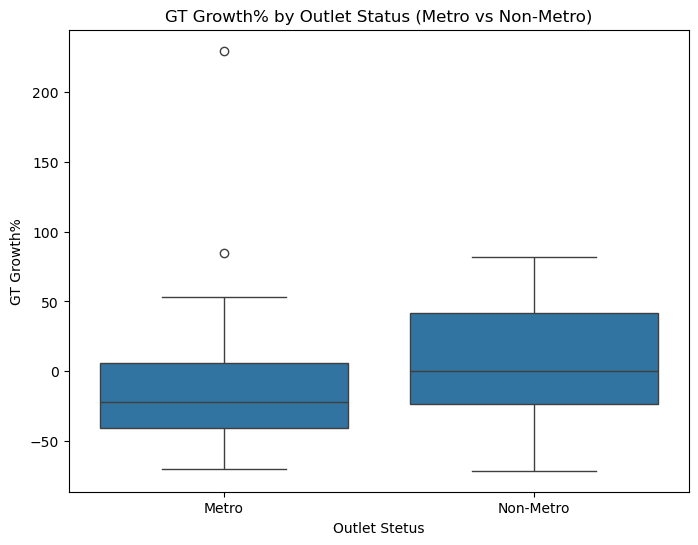

T-statistic: -0.31650426210414284, P-value: 0.7540662348705961


In [12]:
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet Stetus', y='GT Growth%', data=df)
plt.title('GT Growth% by Outlet Status (Metro vs Non-Metro)')
plt.show()

# Independent T-test
metro_gt = df[df['Outlet Stetus'] == 'Metro']['GT Growth%']
non_metro_gt = df[df['Outlet Stetus'] == 'Non-Metro']['GT Growth%']

t_stat_gt, p_value_gt = ttest_ind(metro_gt, non_metro_gt, equal_var=False)
print(f"T-statistic: {t_stat_gt}, P-value: {p_value_gt}")

### 2. Visualize GT Growth% by Division Status

In [13]:
# List of Divisional Districts
divisional_districts = ['Barishal', 'Khulna', 'Rajshahi', 'Rangpur', 'Mymensingh', 'Sylhet', 'Chittagong', 'Dhaka', 'Comilla']

# Create a new column 'Division Status'
df['Division Status'] = df['District'].apply(lambda x: 'Divisional' if x in divisional_districts else 'Non-Divisional')

# Check if it worked
df[['District', 'Division Status']].head()

,District,Division Status
0,Dhaka,Divisional
1,Dhaka,Divisional
2,Madaripur,Non-Divisional
3,Gazipur,Non-Divisional
4,Satkhira,Non-Divisional


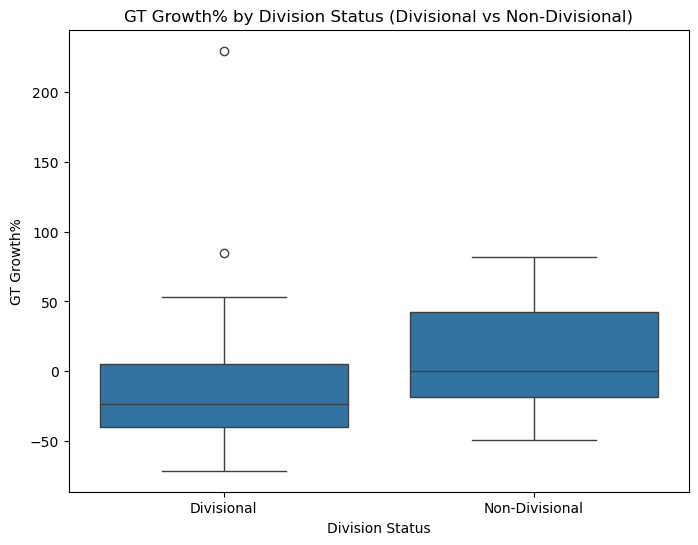

In [14]:
# Boxplot to visualize
plt.figure(figsize=(8, 6))
sns.boxplot(x='Division Status', y='GT Growth%', data=df)
plt.title('GT Growth% by Division Status (Divisional vs Non-Divisional)')
plt.show()

In [15]:
from scipy.stats import ttest_ind

# Split the data
divisional_gt = df[df['Division Status'] == 'Divisional']['GT Growth%']
non_divisional_gt = df[df['Division Status'] == 'Non-Divisional']['GT Growth%']

# T-Test
t_stat, p_value = ttest_ind(divisional_gt, non_divisional_gt, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -0.5546052399851192
P-value: 0.5834899181558661


### 3. Outlet Status vs Memo Growth %
### ✅ Statistical Test: Independent T-test

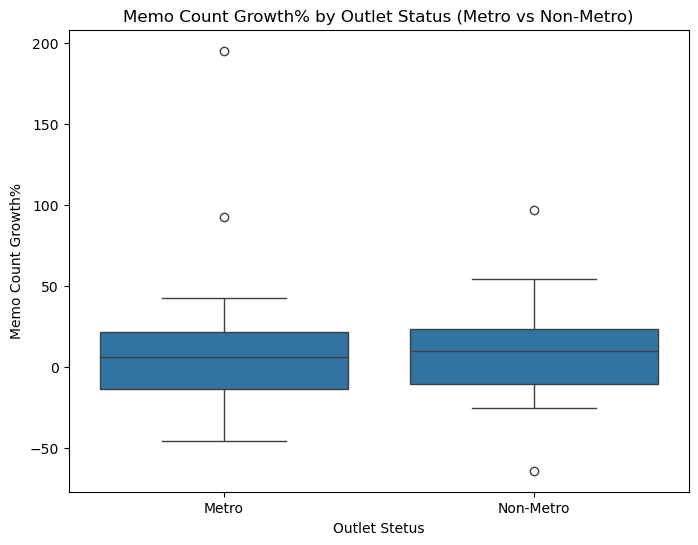

T-statistic: 0.3984953073626294, P-value: 0.6932768640540907


In [16]:
# Boxplot for visual comparison
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet Stetus', y='Memo Count Growth%', data=df)
plt.title('Memo Count Growth% by Outlet Status (Metro vs Non-Metro)')
plt.show()

# Independent T-test
metro_memo = df[df['Outlet Stetus'] == 'Metro']['Memo Count Growth%']
non_metro_memo = df[df['Outlet Stetus'] == 'Non-Metro']['Memo Count Growth%']

t_stat_memo, p_value_memo = ttest_ind(metro_memo, non_metro_memo, equal_var=False)
print(f"T-statistic: {t_stat_memo}, P-value: {p_value_memo}")

### 4. Memo Count Growth% vs Division Status

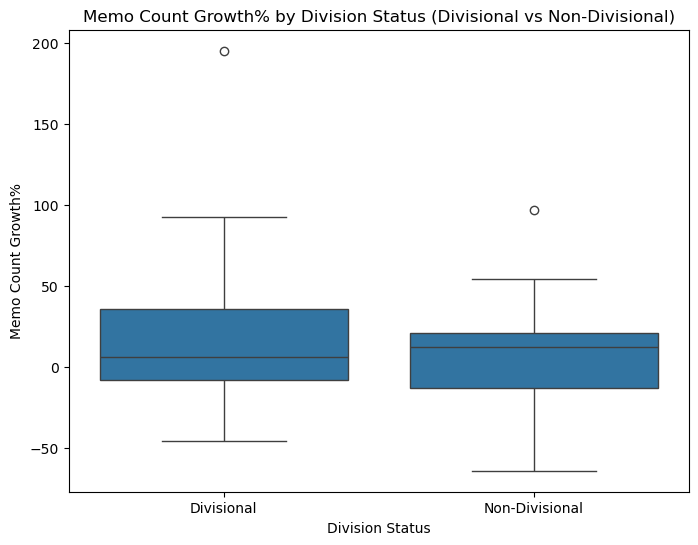

T-statistic: 0.6172385840955764
P-value: 0.5417490313459478


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for Memo Count Growth% by Division Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Division Status', y='Memo Count Growth%', data=df)
plt.title('Memo Count Growth% by Division Status (Divisional vs Non-Divisional)')
plt.xlabel('Division Status')
plt.ylabel('Memo Count Growth%')
plt.show()

from scipy.stats import ttest_ind

# Create group samples
divisional_memo = df[df['Division Status'] == 'Divisional']['Memo Count Growth%']
non_divisional_memo = df[df['Division Status'] == 'Non-Divisional']['Memo Count Growth%']

# Run T-Test
t_stat_memo, p_value_memo = ttest_ind(divisional_memo, non_divisional_memo, equal_var=False)

print(f"T-statistic: {t_stat_memo}")
print(f"P-value: {p_value_memo}")